In [3]:
import os
from omegaconf import OmegaConf
import hydra
import pytorch_lightning as pl

# 설정 경로 및 파일 정의
dir_path = "/home/work/reality/hojae/genAI/Diffusion/saved_models/2024_11_22_07_48_21"
ckpt = "/home/work/reality/hojae/genAI/Diffusion/saved_models/2024_11_22_07_48_21/epoch=46-valid_loss=0.01795644313097.ckpt"

# config.yaml 파일 로드
config = OmegaConf.load(os.path.join(dir_path, 'config.yaml'))

# Hydra를 사용하여 모듈 및 구성 객체 생성
denoiser_module = hydra.utils.instantiate(config.denoiser_module)
scheduler = hydra.utils.instantiate(config.scheduler)
opt = hydra.utils.instantiate(config.optimizer)

# 모델 클래스 가져오기
model_class = hydra.utils.get_class(config.model._target_)  # 모델 클래스 확인

# 체크포인트에서 모델 복원
model = model_class.load_from_checkpoint(
    checkpoint_path=ckpt,
    denoiser_module=denoiser_module,
    opt=opt,
    variance_scheduler=scheduler
)

# 평가 모드로 설정
model.eval()

# 샘플링 호출
batch_size = 64  # 원하는 배치 크기
T = config.noise_steps  # diffusion step 수
generated_images = model.sample(batch_size=batch_size, T=T)

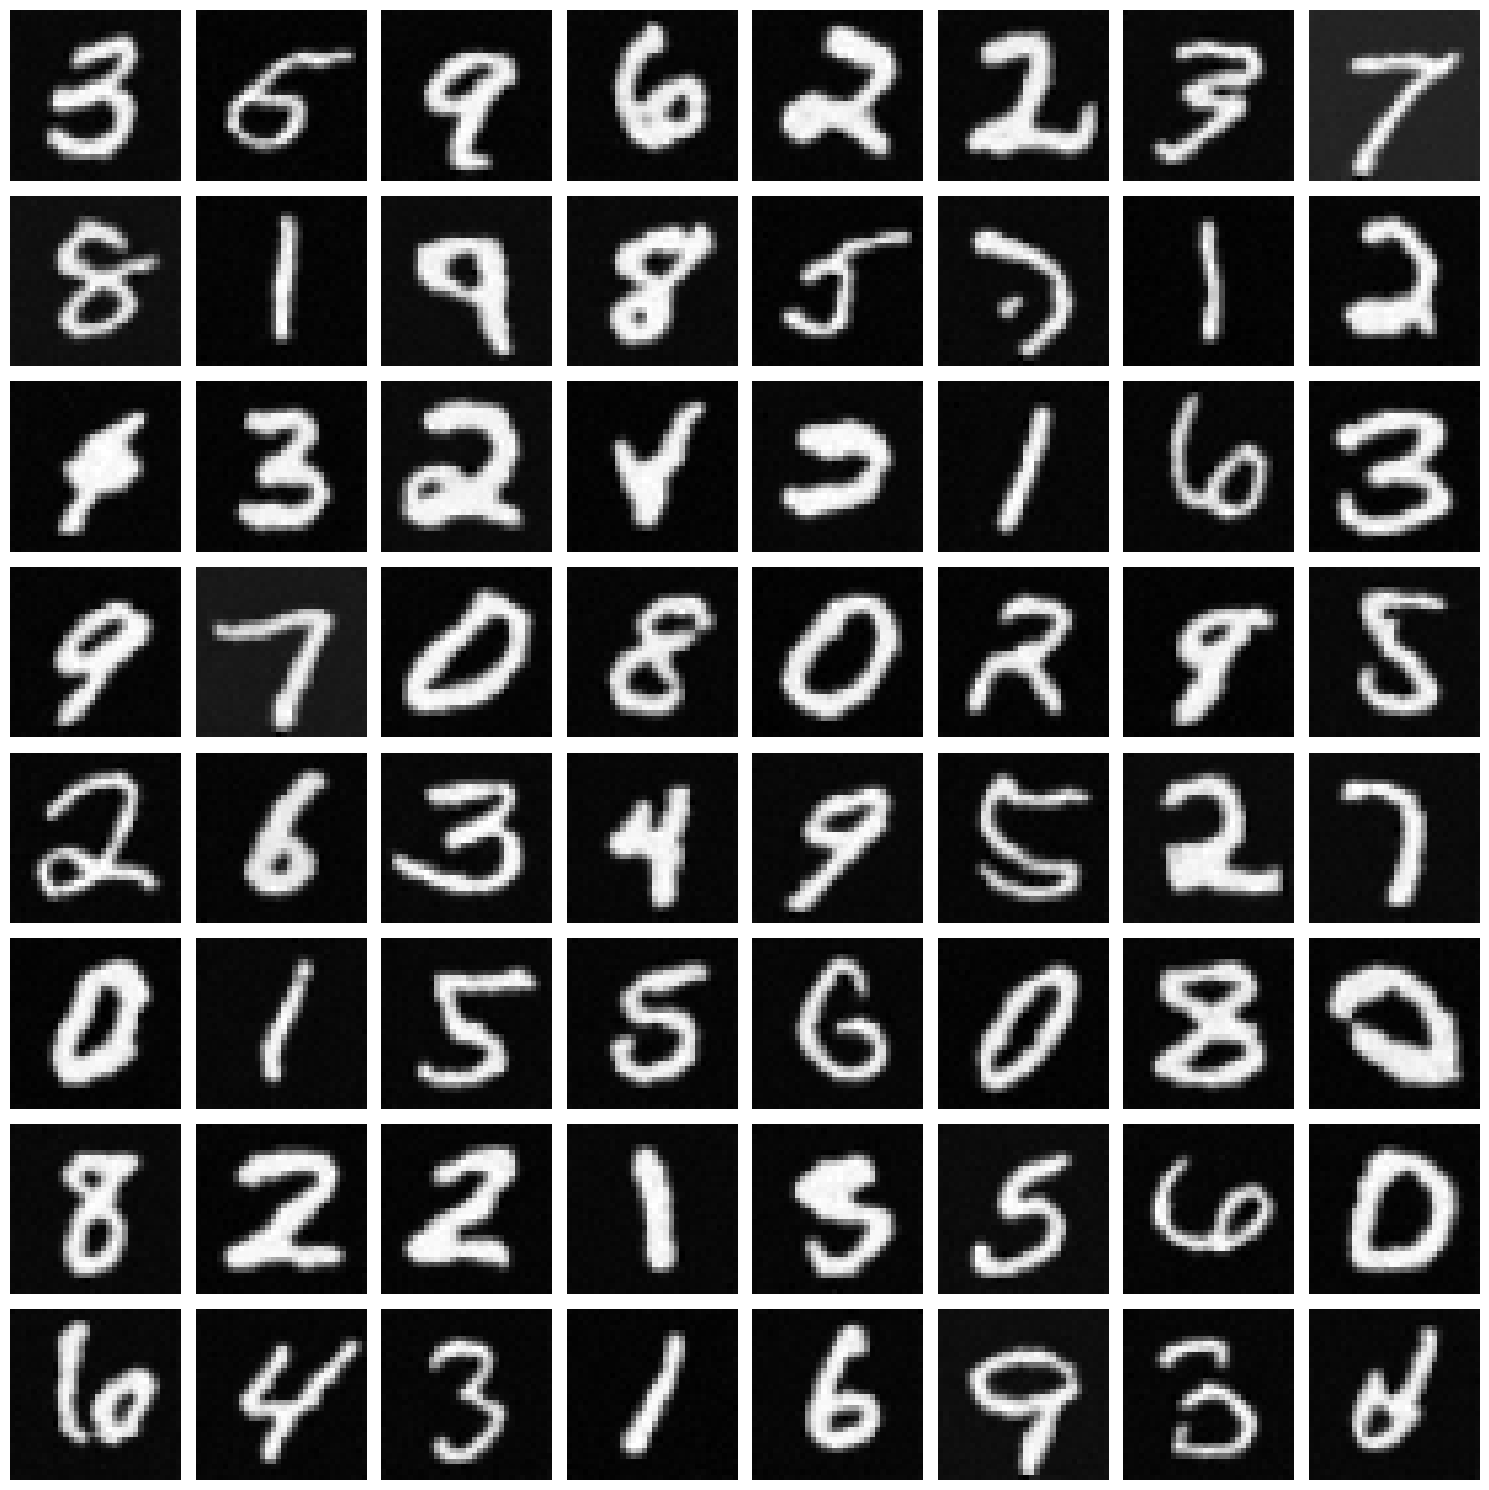

In [4]:
import matplotlib.pyplot as plt

# 이미지 시각화를 위한 8x8 격자 설정
grid_size = 8  # 가로, 세로 크기
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for i in range(grid_size):
    for j in range(grid_size):
        idx = i * grid_size + j  # 이미지 인덱스
        axs[i, j].imshow(generated_images[idx].permute(1, 2, 0).cpu().numpy(), cmap="gray")
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()